# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요  
쭉 실행시켜주시고, 데이터 스케일링 빈칸은 채워주세요!

In [1]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [3]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [4]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [6]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

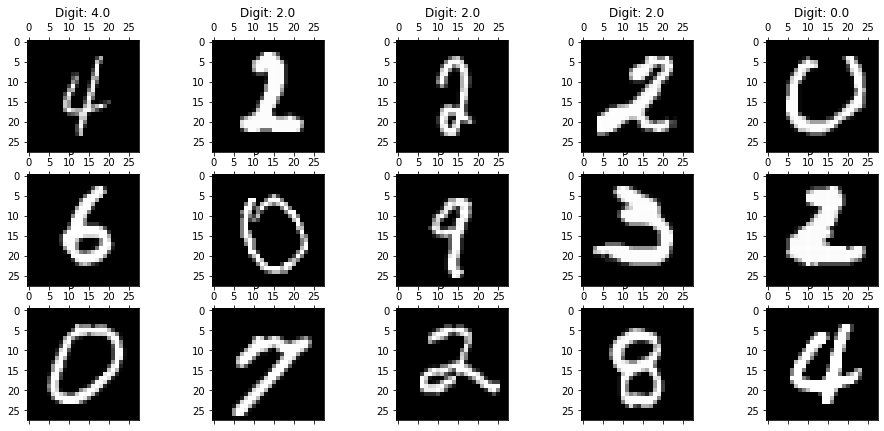

In [7]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) 스케일링 해주세요

In [9]:
# 이미지 데이터 스케일링 시, 타겟값은 음수를 포함하지 않아야 합니다!
# 왜곡이 생길 우려가 있는 스케일링도 지양해주세요
scaled_X = X/255

### 2) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할해주세요

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = 10) 

In [12]:
print(f"shape of X_train : {X_train.shape}\nshape of X_test : {X_test.shape}\nshape of y_train : {y_train.shape}\nshape of y_test : {y_test.shape}\n")

shape of X_train : (56000, 784)
shape of X_test : (14000, 784)
shape of y_train : (56000, 1)
shape of y_test : (14000, 1)



### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 3) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주세요!<br>
scree plot을 직접 그려서 확인해주세요!

In [13]:
from sklearn.decomposition import PCA

In [14]:
# 목표 설명 비중을 만족시키는 성분을 추출하는 방법
pca = PCA()     
X_pca = pca.fit_transform(X_train)

In [17]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

0      0.097299
1      0.168603
2      0.230336
3      0.284121
4      0.333254
         ...   
779    1.000000
780    1.000000
781    1.000000
782    1.000000
783    1.000000
Length: 784, dtype: float64

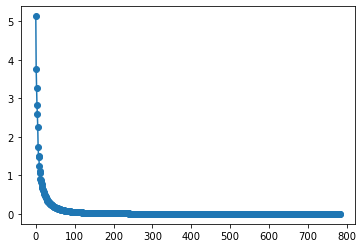

In [20]:
plt.plot(pca.explained_variance_,'o-')

In [21]:
sum_ratio = pd.Series(np.cumsum(pca.explained_variance_ratio_))

In [27]:
sum_ratio[40]

0.7913746427906053

In [28]:
#scree_plot에서 knee_point를 찾기에 어려움이 있어, 설명 비율의 합을이 70%~80%인 곳이 주성분개수라고 하였다.
#때문에 약 40개의 주성분이 있다고 볼 수 있다.

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [30]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_train, np.ravel(y_train))

In [31]:
sum_ratio_lda = pd.Series(np.cumsum(lda.explained_variance_ratio_))

In [32]:
sum_ratio_lda

0    0.237867
1    0.441052
2    0.617926
3    0.725315
4    0.820056
5    0.889013
6    0.938627
7    0.972995
8    1.000000
dtype: float64

위의 결과를 보아 약 82퍼센트의 설명력을 가질 때인 5를 주성분의 개수라고 할 수 있다.

## 차원 축소

In [34]:
#PCA
pca = PCA(n_components = 40)
X_train_pca = pca.fit_transform(X_train)

In [ ]:
#LDA
lda = LinearDiscriminantAnalysis(n_components = 5)
X_train_lda = lda.fit_transform(X_train, np.ravel(y_train))